In [10]:
import numpy as np      #科学计算包  
import matplotlib.pyplot as plt      #python画图包  
  
from sklearn.cluster import KMeans       #导入K-means算法包  
from sklearn.datasets import make_blobs  
%matplotlib inline
plt.figure(figsize=(12, 12))  
  
''''' 
make_blobs函数是为聚类产生数据集 
产生一个数据集和相应的标签 
n_samples:表示数据样本点个数,默认值100 
n_features:表示数据的维度，默认值是2 
centers:产生数据的中心点，默认值3 
cluster_std：数据集的标准差，浮点数或者浮点数序列，默认值1.0 
center_box：中心确定之后的数据边界，默认值(-10.0, 10.0) 
shuffle ：洗乱，默认值是True 
random_state:官网解释是随机生成器的种子 
更多参数即使请参考：http://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs 
'''  
n_samples = 1500  
random_state = 170  
X, y = make_blobs(n_samples=n_samples, random_state=random_state)  
  
  
# Incorrect number of clusters  
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)  

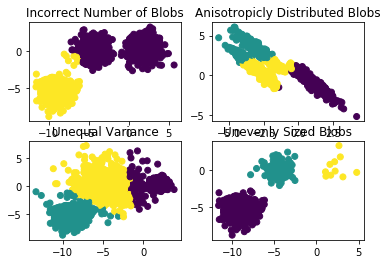

In [11]:
plt.subplot(221)  #在2图里添加子图1  
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #scatter绘制散点  
plt.title("Incorrect Number of Blobs")   #加标题  
  
# Anisotropicly distributed data  
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]  
X_aniso = np.dot(X, transformation)    #返回的是乘积的形式  
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)  

plt.subplot(222)#在2图里添加子图2  
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)  
plt.title("Anisotropicly Distributed Blobs")  
  
# Different variance  
X_varied, y_varied = make_blobs(n_samples=n_samples,  
                                cluster_std=[1.0, 2.5, 0.5],  
                                random_state=random_state)  
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)  
  
plt.subplot(223)#在2图里添加子图3  
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)  
plt.title("Unequal Variance")  
  
# Unevenly sized blobs  
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))  
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)  
  
plt.subplot(224)#在2图里添加子图4  
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)   
plt.title("Unevenly Sized Blobs")  
  
plt.show() #显示图

0.04700279235839844
MiniBatchKMeans(batch_size=45, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=10, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
0.03500199317932129


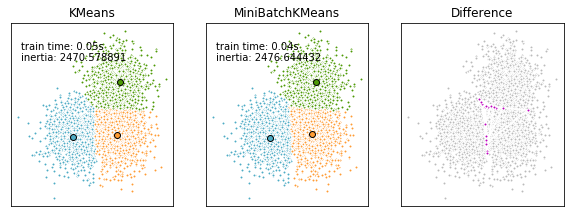

In [14]:
import time  
  
import numpy as np  
import matplotlib.pyplot as plt  
  
from sklearn.cluster import MiniBatchKMeans, KMeans  
from sklearn.metrics.pairwise import pairwise_distances_argmin  
from sklearn.datasets.samples_generator import make_blobs  
  
##############################################################################  
# Generate sample data  
np.random.seed(0)  
  
batch_size = 45  
centers = [[1, 1], [-1, -1], [1, -1]] #初始化三个中心  
n_clusters = len(centers)       #聚类的数目为3  
#产生3000组两维的数据，以上边三个点为中心，以（-10,10）为边界，数据集的标准差是0.7  
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)  
  
##############################################################################  
# Compute clustering with Means  
  
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)  
t0 = time.time() #当前时间  
k_means.fit(X)  
#使用K-Means 对 3000数据集训练算法的时间消耗  
t_batch = time.time() - t0  
print(t_batch)
  
##############################################################################  
# Compute clustering with MiniBatchKMeans  
  
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,  
                      n_init=10, max_no_improvement=10, verbose=0)  
t0 = time.time()  
print(mbk.fit(X))  
#使用MiniBatchKMeans 对 3000数据集训练算法的时间消耗  
t_mini_batch = time.time() - t0  
print(t_mini_batch)
  
##############################################################################  
# Plot result  
  
#创建一个绘图对象, 并设置对象的宽度和高度, 如果不创建直接调用plot, Matplotlib会直接创建一个绘图对象  
''''' 
当绘图对象中有多个轴的时候，可以通过工具栏中的Configure Subplots按钮， 
交互式地调节轴之间的间距和轴与边框之间的距离。 
如果希望在程序中调节的话，可以调用subplots_adjust函数， 
它有left, right, bottom, top, wspace, hspace等几个关键字参数， 
这些参数的值都是0到1之间的小数，它们是以绘图区域的宽高为1进行正规化之后的坐标或者长度。 
'''  
fig = plt.figure(figsize=(8, 3))  
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)  
colors = ['#4EACC5', '#FF9C34', '#4E9A06']  
  
# We want to have the same colors for the same cluster from the  
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per  
# closest one.  
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)  
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)  
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)  
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)  
order = pairwise_distances_argmin(k_means_cluster_centers,  
                                  mbk_means_cluster_centers)  
  
# KMeans  
ax = fig.add_subplot(1, 3, 1) #add_subplot  图像分给为 一行三列，第一块  
for k, col in zip(range(n_clusters), colors):  
    my_members = k_means_labels == k  
    cluster_center = k_means_cluster_centers[k]  
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',  
            markerfacecolor=col, marker='.')  
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  
            markeredgecolor='k', markersize=6)  
ax.set_title('KMeans')  
ax.set_xticks(())  
ax.set_yticks(())  
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (  
    t_batch, k_means.inertia_))  
  
# MiniBatchKMeans  
ax = fig.add_subplot(1, 3, 2)#add_subplot  图像分给为 一行三列，第二块  
for k, col in zip(range(n_clusters), colors):  
    my_members = mbk_means_labels == order[k]  
    cluster_center = mbk_means_cluster_centers[order[k]]  
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',  
            markerfacecolor=col, marker='.')  
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  
            markeredgecolor='k', markersize=6)  
ax.set_title('MiniBatchKMeans')  
ax.set_xticks(())  
ax.set_yticks(())  
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %  
         (t_mini_batch, mbk.inertia_))  
  
# Initialise the different array to all False  
different = (mbk_means_labels == 4)  
ax = fig.add_subplot(1, 3, 3)#add_subplot  图像分给为 一行三列，第三块  
  
for k in range(n_clusters):  
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))  
  
identic = np.logical_not(different)  
ax.plot(X[identic, 0], X[identic, 1], 'w',  
        markerfacecolor='#bbbbbb', marker='.')  
ax.plot(X[different, 0], X[different, 1], 'w',  
        markerfacecolor='m', marker='.')  
ax.set_title('Difference')  
ax.set_xticks(())  
ax.set_yticks(())  
  
plt.show()

'' 
当绘图对象中有多个轴的时候，可以通过工具栏中的Configure Subplots按钮， 
交互式地调节轴之间的间距和轴与边框之间的距离。 
如果希望在程序中调节的话，可以调用subplots_adjust函数， 
它有left, right, bottom, top, wspace, hspace等几个关键字参数， 
这些参数的值都是0到1之间的小数，它们是以绘图区域的宽高为1进行正规化之后的坐标或者长度。 

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


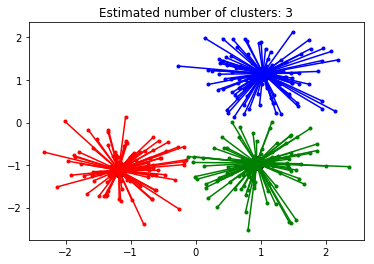

In [17]:
# 亲和力传播聚类算法演示
# 英文网址：http://scikit-learn.org/dev/auto_examples/cluster/plot_affinity_propagation.html
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)
#print(X)
#print(labels_true)
# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()